Importar librerías y cargar los datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el dataset
file_path = "winequality-red.csv"
wine_data = pd.read_csv(file_path)

# Ver las primeras filas
print(wine_data.head())
print("\n🔍 Información del dataset:")
print(wine_data.info())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Preprocesamiento de datos

In [5]:
# Verificar valores nulos
print("\n🔍 Valores nulos en cada columna:")
print(wine_data.isnull().sum())

# Convertir la variable de calidad en binaria (ejemplo: calidad ≥ 6 es 1, si no es 0)
wine_data["quality"] = wine_data["quality"].apply(lambda x: 1 if x >= 6 else 0)

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_data.iloc[:, :-1])

# Variables de entrada y salida
X = X_scaled
y = wine_data["quality"]



🔍 Valores nulos en cada columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Selección de características más relevantes

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

# Aplicar selección de características
selector = SelectKBest(score_func=f_classif, k=6)
X_selected = selector.fit_transform(X, y)

# Mostrar las características más importantes
selected_features = wine_data.columns[:-1][selector.get_support()]
print("\n🔹 Características seleccionadas:", selected_features.tolist())



🔹 Características seleccionadas: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


 Dividir el dataset en entrenamiento y prueba

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print("\n✅ División de datos completada.")
print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de prueba: {X_test.shape}")



✅ División de datos completada.
Tamaño de entrenamiento: (1279, 6)
Tamaño de prueba: (320, 6)


Entrenar el modelo con Árboles de Decisión

C:\Users\jaider.beltran\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


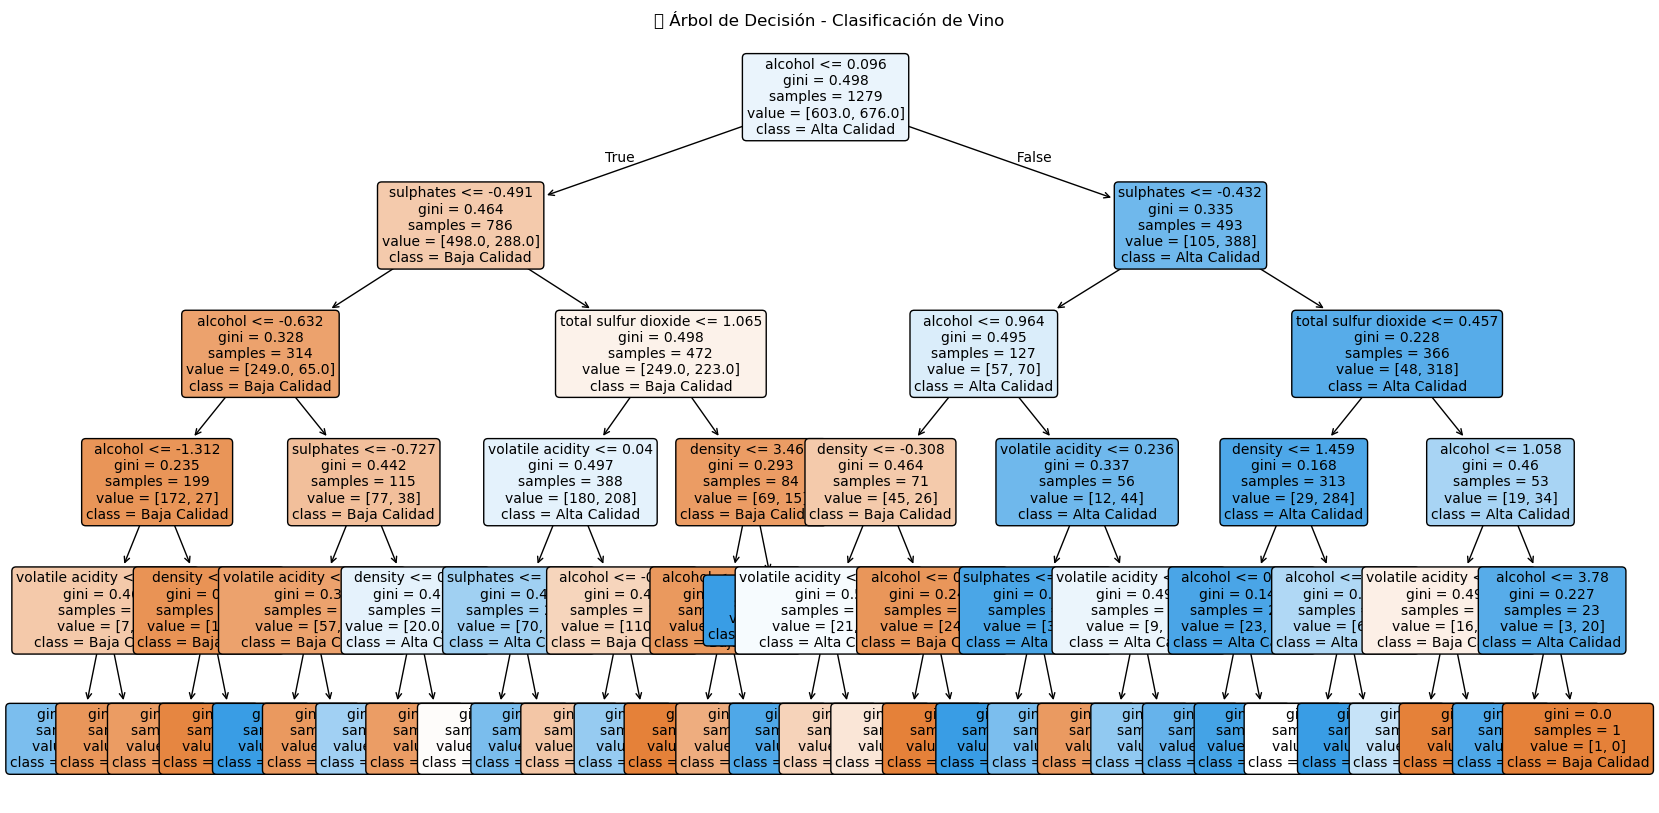

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entrenar el modelo
tree_model = DecisionTreeClassifier(
    criterion="gini",        # O puedes usar "entropy"
    max_depth=5,             # Puedes ajustar este valor según desempeño
    random_state=42
)
tree_model.fit(X_train, y_train)

# Mostrar estructura del árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=selected_features,
          class_names=["Baja Calidad", "Alta Calidad"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("🌳 Árbol de Decisión - Clasificación de Vino")
plt.show()



Evaluar el desempeño del modelo

In [17]:
# Hacer predicciones
y_pred = tree_model.predict(X_test)

# Evaluar con métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\n✅ Exactitud del modelo: {accuracy:.2f}")
print("\n🔹 Matriz de Confusión:")
print(conf_matrix)
print("\n📊 Reporte de Clasificación:")
print(report)



✅ Exactitud del modelo: 0.69

🔹 Matriz de Confusión:
[[109  32]
 [ 66 113]]

📊 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69       141
           1       0.78      0.63      0.70       179

    accuracy                           0.69       320
   macro avg       0.70      0.70      0.69       320
weighted avg       0.71      0.69      0.69       320



Visualizar resultados

C:\Users\jaider.beltran\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


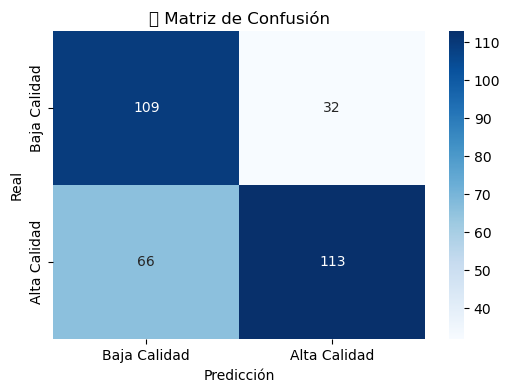

In [20]:
# Gráfico de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Baja Calidad", "Alta Calidad"], yticklabels=["Baja Calidad", "Alta Calidad"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("📊 Matriz de Confusión")
plt.show()
